<a href="https://colab.research.google.com/github/yazhinil/FMML20230017/blob/main/Module%2004%20Lab%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [145]:
#importing sonar dataset
from sklearn.datasets import fetch_openml

sonar_data = fetch_openml(name='sonar', version=1)

X = sonar_data.data
X= np.float64(X)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

#adding bias term 1 to array X
bias_term= np.ones((X.shape[0],1))
X_bias = np.concatenate((X, bias_term), axis=1)

y= np.array(np.full((208,1),-1))


Shape of X: (208, 60)
Shape of y: (208, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


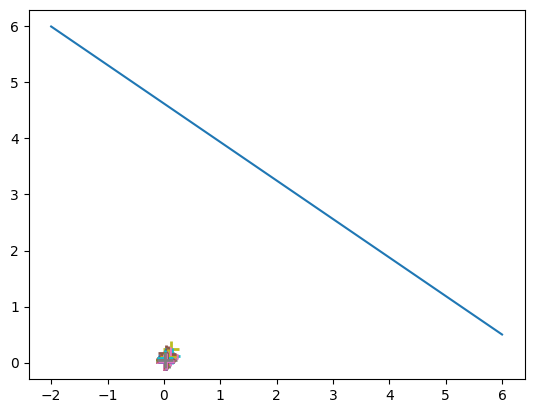

In [138]:
for d, sample in enumerate(X_bias):

    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)

    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plt.plot([-2, 6], [6, 0.5])

In [139]:
#does not converge even after high learning rate
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 150

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [140]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


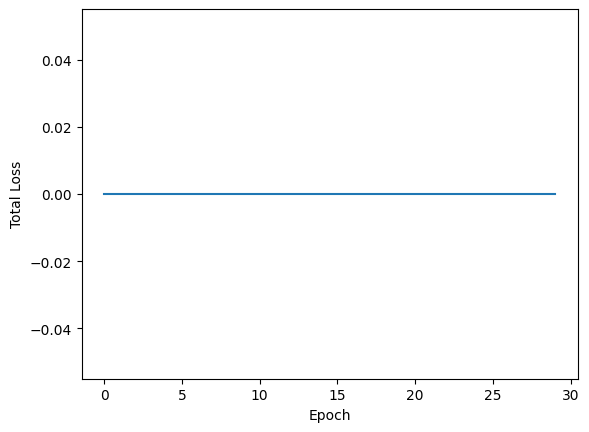

In [141]:
#error plot
w = perceptron_algo_plot(X_bias, y)

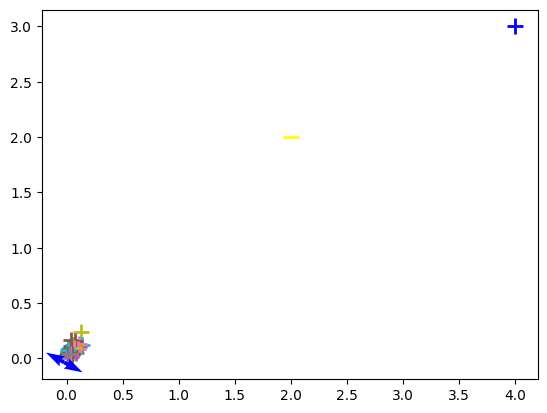

In [142]:
for d, sample in enumerate(X):

    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)

    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')
#gives the same result even with high learning rate

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


[-0.02   -0.0371 -0.0428 -0.0207 -0.0954 -0.0986 -0.1539 -0.1601 -0.3109
 -0.2111 -0.1609 -0.1582 -0.2238 -0.0645 -0.066  -0.2273 -0.31   -0.2999
 -0.5078 -0.4797 -0.5783 -0.5071 -0.4328 -0.555  -0.6711 -0.6415 -0.7104
 -0.808  -0.6791 -0.3857 -0.1307 -0.2604 -0.5121 -0.7547 -0.8537 -0.8507
 -0.6692 -0.6097 -0.4943 -0.2744 -0.051  -0.2834 -0.2825 -0.4256 -0.2641
 -0.1386 -0.1051 -0.1343 -0.0383 -0.0324 -0.0232 -0.0027 -0.0065 -0.0159
 -0.0072 -0.0167 -0.018  -0.0084 -0.009  -0.0032 -1.    ]


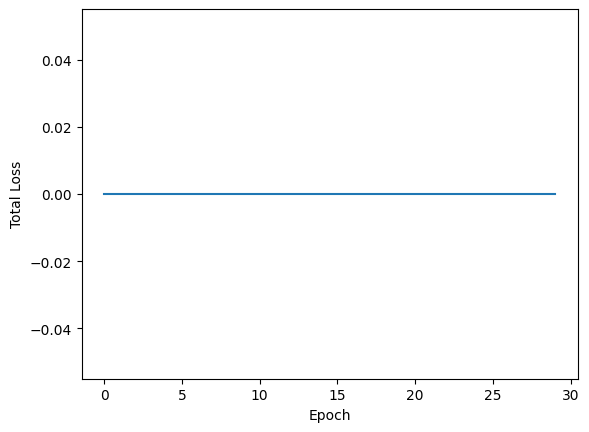

In [146]:
#The dataset is not linearly seperable hence, the following result.The weights are all in a straight line, which leads to an infinite loop.
print(perceptron_algo_plot(X_bias, y))